# Α. Τα Στοιχεία της  Ομάδας είναι:<em> Dataset 1ο "Heart Disease Prediction"(Task Force 1)</em>

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Μάριος Αλέξανδρος Μορφόπουλος  | 1058102
Κωνσταντίνος Μωραγέμος | 1059583
Γεωργία Μαρία Φωτοπούλου | 1059597

# Οι βιβλιοθήκες που θα χρησιμοποιήσουμε είναι οι ακόλουθες:


In [8]:
import numpy  as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Β. Εισαγωγή του dataset

    1.Το dataset "Heart Disease Prediction"(Task Force 1) περιλαμβάνει 14 στήλες με δείγματα απο χαρακτηριστικα ασθενών.
    2.Το πεδίο "στόχος" αναφέρεται στην παρουσία καρδιακής νόσου στον αντίστοιχο ασθενή.(0 για καμία παρουσία,1 για παρουσία)
    3.Οπότε καταλαβαίνουμε ότι είναι πρόβλημα "binary classification" και θα πρέπει να δημιουργήσουμε μοντέλα που να προβλέπουν με ακρίβεια την πιθανότητα καρδιακής νόσου.
        
     Πληροφορίες για τα features του dataset:
        
    * age
    * sex
    * chest pain type (4 values)
    * resting blood pressure
    * serum cholestoral in mg/dl
    * fasting blood sugar > 120 mg/dl
    * resting electrocardiographic results (values 0,1,2)
    * maximum heart rate achieved
    * exercise induced angina
    * oldpeak = ST depression induced by exercise relative to rest
    * the slope of the peak exercise ST segment
    * number of major vessels (0-3) colored by flourosopy
    * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    * target:0 for no presence of heart disease, 1 for presence of heart disease
    

**Διάβασμα του dataset**

In [48]:
df = pd.read_csv('Dataset 1.csv')

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Γ. Ανάλυση των δεδομένων, επεξεργασία και αναπαράσταση τιμών.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Παρατηρούμε ότι στο dataset δεν υπάρχουν ελλιπείς τιμές**

In [51]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Barplot που δείχνει το πλήθος ανα target**

<AxesSubplot:xlabel='target', ylabel='count'>

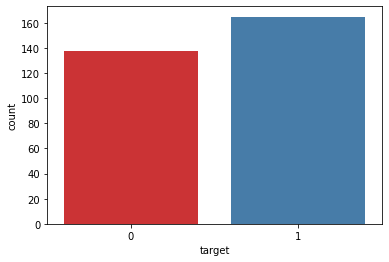

In [74]:
sns.countplot(x='target',data=df,palette="Set1")

**Pairplot που δείχνει την σχέση ανάμεσα στa age,trestbps,chol,thalach και target**

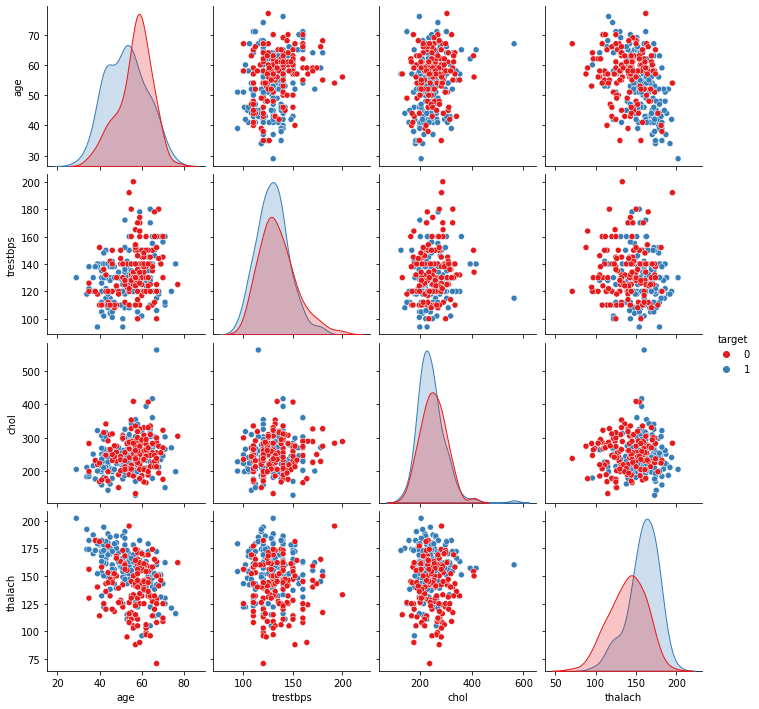

In [73]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target',palette="Set1")

In [16]:
df['target'].sum()


165

In [17]:
df.groupby(['target']).count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


In [18]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [19]:
X = df.loc[:, df.columns != 'target']
y = df.loc[:,'target']

In [21]:
from imblearn.under_sampling import RandomUnderSampler
# Save the non-undersampled data in X_all, y_all and X, y will have the undersampled data for dataset balancing
X, y = RandomUnderSampler().fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [22]:
X.shape

(303, 13)

In [24]:
y.shape

(303,)

In [25]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_scaled = scaler.fit_transform(X)

In [36]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time




#Εδω καλω selector για να το χρησιμοποιησω στις παραμετρους
selector = VarianceThreshold()

#Εδω καλω το pca για να το χρησιμοποιησω στις παραμετρους
pca = PCA()

# gnb = GaussianNB()
knn = KNeighborsClassifier(n_jobs=-1)
# # mlp = MLPClassifier()


# # select one classifier declared below, e.g. mlp
clf = knn
clf_name = 'knn'
pipe = Pipeline(steps=[('selector', selector), ('pca', pca), (clf_name, clf)], memory = 'tmp')
# # pipe = Pipeline(steps=[('kNN', knn)], memory = 'tmp')
# # pipe = Pipeline(steps=[('scaler', scaler), ('kNN', knn)], memory = 'tmp')
# # pipe = Pipeline(steps=[('mlp', mlp)], memory = 'tmp')


import time

start_time = time.time()

parameters = {  
                'selector__threshold' : [0, 2.5e-4, 3e-4, 3.5e-4, 4e-4],
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                f'{clf_name}__n_neighbors'    : list(range(1, 50, 2)),
                f'{clf_name}__metric'         : ('manhattan', 'euclidean', 'chebyshev', 'minkowski'),
                f'{clf_name}__weights'        : ('uniform', 'distance')
             }


clf_micro = GridSearchCV(pipe, parameters, scoring='f1_micro', cv=5, n_jobs=-1)
clf_micro.fit(X_scaled)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('micro =', clf_micro.best_score_)

print(time.time() - start_time)

TypeError: check_array() got an unexpected keyword argument 'multi_output'